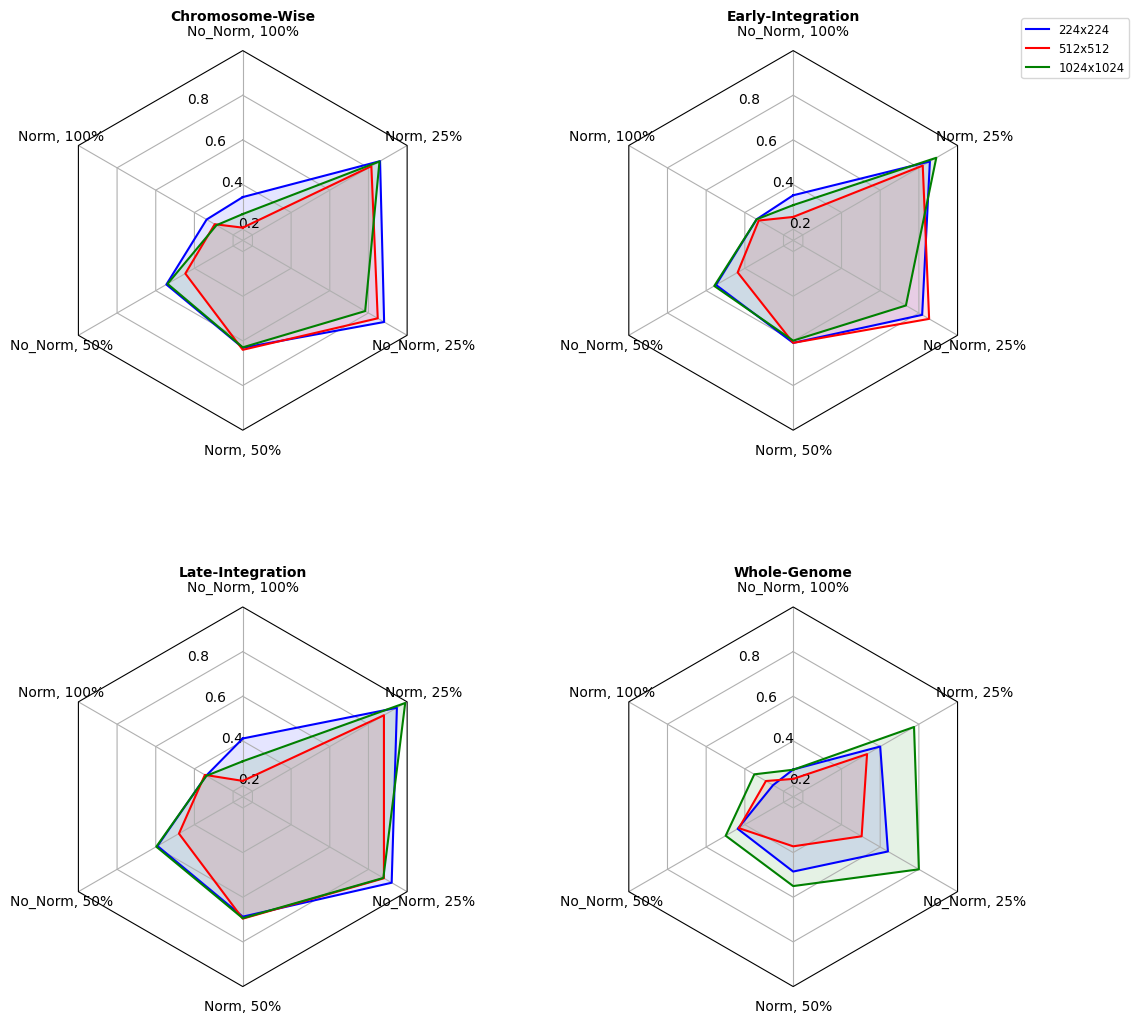

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


# === Radar chart projection setup ===
def radar_factory(num_vars, frame='polygon'):
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):
        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self, spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


# === Data setup ===
labels = [
    'No_Norm, 100%',
    'Norm, 100%',
    'No_Norm, 50%',
    'Norm, 50%',
    'No_Norm, 25%',
    'Norm, 25%'
]
# Dataset for species resolutions
# datasets = [
#     ('224', {
#         'Chromosome-Wise':     [0.344, 0.337, 0.545, 0.631, 0.881, 0.860],
#         'Early-Integration':   [0.352, 0.339, 0.549, 0.609, 0.817, 0.857],
#         'Late-Integration':    [0.411, 0.339, 0.591, 0.687, 0.920, 0.947],
#         'Whole-Genome':        [0.272, 0.254, 0.437, 0.485, 0.640, 0.600]
#     }),
#     ('512', {
#         'Chromosome-Wise':     [0.207, 0.295, 0.447, 0.640, 0.848, 0.815],
#         'Early-Integration':   [0.255, 0.328, 0.437, 0.609, 0.853, 0.820],
#         'Late-Integration':    [0.221, 0.346, 0.480, 0.696, 0.880, 0.880],
#         'Whole-Genome':        [0.230, 0.291, 0.431, 0.372, 0.504, 0.532]
#     }),
#     ('1024', {
#         'Chromosome-Wise':     [0.268, 0.286, 0.539, 0.629, 0.783, 0.857],
#         'Early-Integration':   [0.308, 0.339, 0.558, 0.599, 0.733, 0.890],
#         'Late-Integration':    [0.309, 0.338, 0.597, 0.694, 0.877, 0.990],
#         'Whole-Genome':        [0.271, 0.351, 0.499, 0.550, 0.800, 0.775]
#     })
# ]
# Dataset for cultivar resolutions
# datasets = [
#     ('224', {
#         'Chromosome-Wise':     [0.555, 0.672, 0.545, 0.635, 0.476, 0.633],
#         'Early-Integration':   [0.552, 0.655, 0.520, 0.600, 0.468, 0.594],
#         'Late-Integration':    [0.591, 0.698, 0.593, 0.676, 0.510, 0.680],
#         'Whole-Genome':        [0.261, 0.468, 0.426, 0.691, 0.451, 0.784]
#     }),
#     ('512', {
#         'Chromosome-Wise':     [0.604, 0.664, 0.646, 0.632, 0.470, 0.630],
#         'Early-Integration':   [0.614, 0.649, 0.649, 0.574, 0.455, 0.599],
#         'Late-Integration':    [0.613, 0.664, 0.656, 0.666, 0.513, 0.668],
#         'Whole-Genome':        [0.221, 0.413, 0.407, 0.731, 0.598, 0.797]
#     }),
#     ('1024', {
#         'Chromosome-Wise':     [0.579, 0.649, 0.558, 0.670, 0.460, 0.650],
#         'Early-Integration':   [0.559, 0.645, 0.541, 0.633, 0.451, 0.547],
#         'Late-Integration':    [0.585, 0.666, 0.574, 0.712, 0.482, 0.754],
#         'Whole-Genome':        [0.153, 0.224, 0.302, 0.770, 0.406, 0.790]
#     })
# ]
# Dataset for species methods
datasets = [
    ('Chromosome-Wise', {
        '224x224':  [0.344, 0.337, 0.545, 0.631, 0.881, 0.860],
        '512x512':  [0.207, 0.295, 0.447, 0.640, 0.848, 0.815],
        '1024x1024': [0.268, 0.286, 0.539, 0.629, 0.783, 0.857],
    }),
    ('Early-Integration', {
        '224x224':  [0.352, 0.339, 0.549, 0.609, 0.817, 0.857],
        '512x512':  [0.255, 0.328, 0.437, 0.609, 0.853, 0.820],
        '1024x1024': [0.308, 0.339, 0.558, 0.599, 0.733, 0.890],
    }),
    ('Late-Integration', {
        '224x224':  [0.411, 0.339, 0.591, 0.687, 0.920, 0.947],
        '512x512':  [0.221, 0.346, 0.480, 0.696, 0.880, 0.880],
        '1024x1024': [0.309, 0.338, 0.597, 0.694, 0.877, 0.990],
    }),
    ('Whole-Genome', {
        '224x224':  [0.272, 0.254, 0.437, 0.485, 0.640, 0.600],
        '512x512':  [0.230, 0.291, 0.431, 0.372, 0.504, 0.532],
        '1024x1024': [0.271, 0.351, 0.499, 0.550, 0.800, 0.775],
    })
]
# Dataset for cultivar methods
# datasets = [
#     ('Chromosome-Wise', {
#         '224x224':  [0.555, 0.672, 0.545, 0.635, 0.476, 0.633],
#         '512x512':  [0.604, 0.664, 0.646, 0.632, 0.470, 0.630],
#         '1024x1024': [0.579, 0.649, 0.558, 0.670, 0.460, 0.650],
#     }),
#     ('Early-Integration', {
#         '224x224':  [0.552, 0.655, 0.520, 0.600, 0.468, 0.594],
#         '512x512':  [0.614, 0.649, 0.649, 0.574, 0.455, 0.599],
#         '1024x1024': [0.559, 0.645, 0.541, 0.633, 0.451, 0.547],
#     }),
#     ('Late-Integration', {
#         '224x224':  [0.591, 0.698, 0.593, 0.676, 0.510, 0.680],
#         '512x512':  [0.613, 0.664, 0.656, 0.666, 0.513, 0.668],
#         '1024x1024': [0.585, 0.666, 0.574, 0.712, 0.482, 0.754],
#     }),
#     ('Whole-Genome', {
#         '224x224':  [0.261, 0.468, 0.426, 0.691, 0.451, 0.784],
#         '512x512':  [0.221, 0.413, 0.407, 0.731, 0.598, 0.797],
#         '1024x1024': [0.153, 0.224, 0.302, 0.770, 0.406, 0.790],
#     })
# ]


methods = ['224x224','512x512','1024x1024']
colors = ['b', 'r', 'g']

# === Radar chart plotting ===
N = len(labels)
theta = radar_factory(N, frame='polygon')

fig, axs = plt.subplots(figsize=(12, 12), nrows=2, ncols=2, subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.45, hspace=0.20, top=0.95, bottom=0.1)

# for ax, (title, data_dict) in zip(axs, datasets):
for ax, (title, data_dict) in zip(axs.flat, datasets):
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1), pad=22)
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_ylim(0.15, 1.0)  # Fix the radial axis range from 0 to 1
    for method, color in zip(methods, colors):
        values = data_dict[method]
        ax.plot(theta, values, color=color, label=method)
        ax.fill(theta, values, facecolor=color, alpha=0.1)
    ax.set_varlabels(labels)

# Legend on the middle chart
# axs[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), fontsize='small')
axs.flat[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), fontsize='small')


# Title
# fig.text(0.5, 0.95, 'Comparison of Methods Across Normalization Schemes',
#          horizontalalignment='center', color='black', weight='bold', size='x-large')

# Save as PDF
plt.savefig("radar_chart.pdf", format="pdf", bbox_inches="tight")
# plt.show()